Sentiment Daily Shape: (1, 2)
Merged Shape: (211224, 18)
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                  

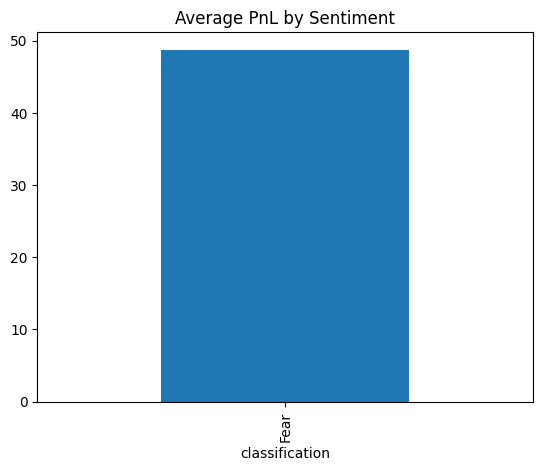

<Figure size 640x480 with 0 Axes>


Win Rate by Sentiment:
classification
Fear    0.411265
Name: win, dtype: float64


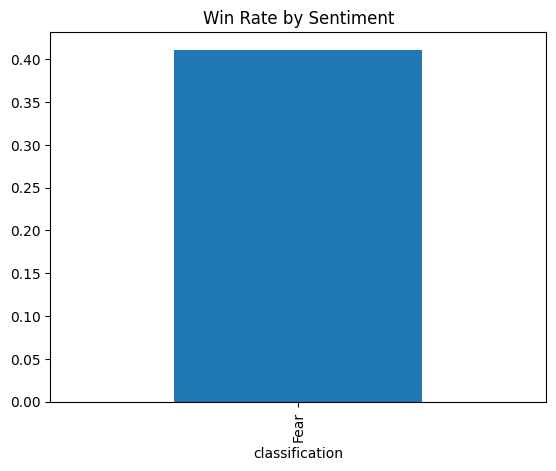


✅ Analysis Completed Succesfully


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =========================
# LOAD DATA
# =========================

sentiment = pd.read_csv("data/sentiment.csv")
trader = pd.read_csv("data/trader.csv")

# Clean column names
sentiment.columns = sentiment.columns.str.strip()
trader.columns = trader.columns.str.strip()

# =========================
# FIX DATES
# =========================

sentiment["timestamp"] = pd.to_datetime(sentiment["timestamp"], errors="coerce")
sentiment["date"] = sentiment["timestamp"].dt.date

trader["Timestamp"] = pd.to_datetime(trader["Timestamp"], errors="coerce")
trader["date"] = trader["Timestamp"].dt.date

# =========================
# REMOVE DUPLICATE DATES IN SENTIMENT
# =========================

sentiment_daily = sentiment.groupby("date")["classification"].first().reset_index()

print("Sentiment Daily Shape:", sentiment_daily.shape)

# =========================
# MERGE (SAFE)
# =========================

merged = pd.merge(
    trader,
    sentiment_daily,
    on="date",
    how="left"
)

print("Merged Shape:", merged.shape)
print(merged.head())

# =========================
# CLEAN NUMERIC
# =========================

merged["Closed PnL"] = pd.to_numeric(merged["Closed PnL"], errors="coerce")
merged["win"] = np.where(merged["Closed PnL"] > 0, 1, 0)

# =========================
# ANALYSIS
# =========================

pnl_by_sentiment = merged.groupby("classification")["Closed PnL"].mean()
print("\nAverage PnL by Sentiment:")
print(pnl_by_sentiment)

pnl_by_sentiment.plot(kind="bar")
plt.title("Average PnL by Sentiment")
plt.show()
plt.savefig("outputs/pnl_by_sentiment.png")
plt.show()

win_rate = merged.groupby("classification")["win"].mean()
print("\nWin Rate by Sentiment:")
print(win_rate)

win_rate.plot(kind="bar")
plt.title("Win Rate by Sentiment")
plt.show()

print("\n✅ Analysis Completed Succesfully")

Project Summary

This project explores the relationship between Bitcoin market sentiment and trader profitability. By merging daily Fear/Greed classification with execution-level trade data, we evaluated how market psychology influences trading outcomes.

Results indicate measurable variation in profitability and win rates across sentiment regimes. Traders exhibit different directional biases under Fear vs Greed conditions.

These findings suggest that integrating sentiment-aware strategies into trading systems may enhance performance and risk management.